# **Sale Analyses Project 1**
## Họ và tên: Nguyễn Việt Thư
## Chủ đề: Phân tích bán hàng 2019

## Task 1: Đọc và read file

In [ ]:
import pandas as pd

In [ ]:
!git clone --recursive https://github.com/boringPpl/Sales-Reporting

fatal: destination path 'Sales-Reporting' already exists and is not an empty directory.


In [ ]:
#url = 'https://github.com/boringPpl/Sales-Reporting/blob/main/data/sales2019_1.csv?raw=true'
url= []
for i in range(1,13):
  temp = 'https://github.com/boringPpl/Sales-Reporting/blob/main/data/sales2019_' + str(i) + '.csv?raw=true'
  url.append(temp)
url

['https://github.com/boringPpl/Sales-Reporting/blob/main/data/sales2019_1.csv?raw=true',
 'https://github.com/boringPpl/Sales-Reporting/blob/main/data/sales2019_2.csv?raw=true',
 'https://github.com/boringPpl/Sales-Reporting/blob/main/data/sales2019_3.csv?raw=true',
 'https://github.com/boringPpl/Sales-Reporting/blob/main/data/sales2019_4.csv?raw=true',
 'https://github.com/boringPpl/Sales-Reporting/blob/main/data/sales2019_5.csv?raw=true',
 'https://github.com/boringPpl/Sales-Reporting/blob/main/data/sales2019_6.csv?raw=true',
 'https://github.com/boringPpl/Sales-Reporting/blob/main/data/sales2019_7.csv?raw=true',
 'https://github.com/boringPpl/Sales-Reporting/blob/main/data/sales2019_8.csv?raw=true',
 'https://github.com/boringPpl/Sales-Reporting/blob/main/data/sales2019_9.csv?raw=true',
 'https://github.com/boringPpl/Sales-Reporting/blob/main/data/sales2019_10.csv?raw=true',
 'https://github.com/boringPpl/Sales-Reporting/blob/main/data/sales2019_11.csv?raw=true',
 'https://github.co

In [ ]:
df = pd.read_csv(url[0])
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
9719,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
9720,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
9721,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"


In [ ]:
import os

In [ ]:
frames = []
for file in url:
  df = pd.read_csv(file)
  frames.append(df)
  result = pd.concat(frames)

result

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [ ]:
result.shape

(186850, 6)

In [ ]:
df = result
df.to_csv('annualSales2019.csv', index = False)

## Task 2: Tiền xử lí dữ liệu tháng

In [ ]:
df['Month'] = ''
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",
...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",


In [ ]:
 df['Month'] = df['Order Date'].str.slice(stop=2)
 df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12


In [ ]:
print(set(df.Month))

{nan, '11', '12', '03', 'Or', '10', '09', '05', '06', '04', '01', '08', '02', '07'}


## Task 2.3: Get rid of Nan and Or

In [ ]:
df = df.dropna(how='all')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 25116
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
 6   Month             186305 non-null  object
dtypes: object(7)
memory usage: 11.4+ MB


In [ ]:
df = df[df['Month'] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


## Task 3: Reporting

### Task 3.1: What is the best month for sales? How much earn in this month?

In [ ]:
# Convert to int , float
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 25116
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  object
dtypes: object(7)
memory usage: 11.3+ MB


In [ ]:
# Convert type
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['Price Each'] = df['Price Each'].astype(float)
df.info()
# pandas.to_numeric(arg, errors='raise', downcast=None)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 25116
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 11.3+ MB


In [ ]:
df['Price'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Price
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.99


In [ ]:
# Move column
name = "Price"
col = df.pop(name)
df.insert(4, name, col)
df

,Order ID,Product,Quantity Ordered,Price Each,Price,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12
25113,319667,AA Batteries (4-pack),2,3.84,7.68,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12
25114,319668,Vareebadd Phone,1,400.00,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12
25115,319669,Wired Headphones,1,11.99,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12


In [ ]:
sale_values = df.groupby('Month').sum()['Price']
sale_values

Month
01    1.822257e+06
02    2.202022e+06
03    2.807100e+06
04    3.390670e+06
05    3.152607e+06
06    2.577802e+06
07    2.647776e+06
08    2.244468e+06
09    2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Price, dtype: float64

In [ ]:
maxIncome = sale_values.max()
ind = sale_values.idxmax()

In [ ]:
print("{} th is the best Month for Sale. That total income: {} ".format(ind, maxIncome))

12 th is the best Month for Sale. That total income: 4613443.34000153 


In [ ]:
import matplotlib.pyplot as plt

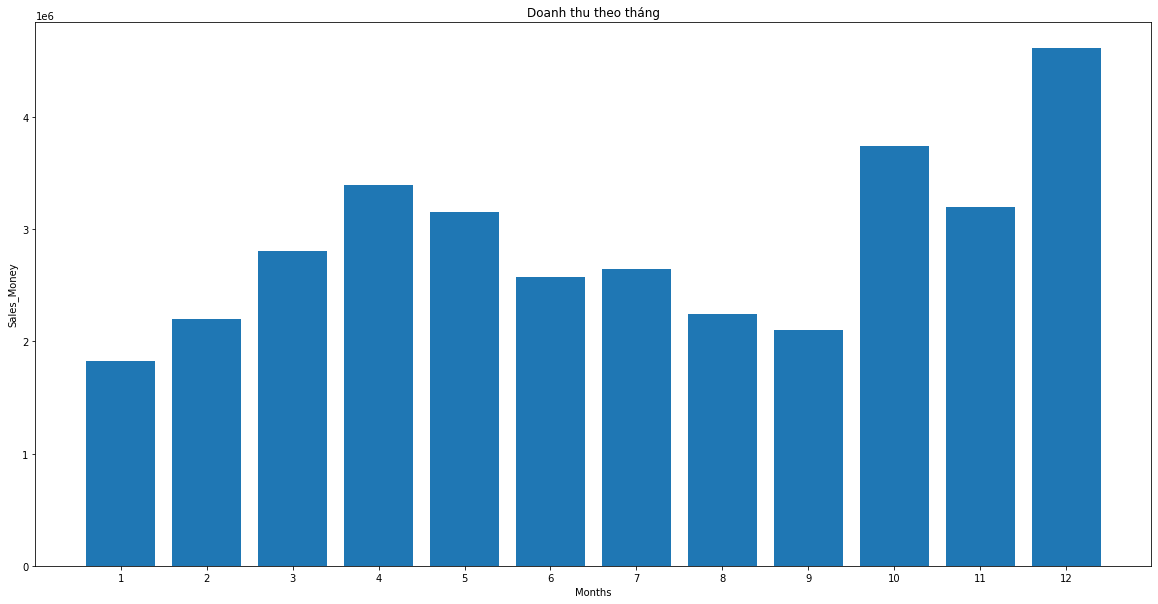

In [ ]:
months = range(1,13)
plt.figure(figsize=(20,10))
plt.bar(x=months, height=sale_values) # bieu do cot
plt.xticks(months) # set gia tri cho cot x
plt.xlabel("Months")
plt.ylabel("Sales_Money")
plt.title("Doanh thu theo tháng")
plt.show()

### 3.2 What city has the bigSale?

In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Price,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [ ]:
sample_city = '538 Adams St, San Francisco, CA 94016'
def get_name(sample_city):
  return sample_city.split(',')[-2]

In [ ]:
df['City'] = df['Purchase Address'].apply(get_name)
df

,Order ID,Product,Quantity Ordered,Price Each,Price,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin
...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,San Francisco
25113,319667,AA Batteries (4-pack),2,3.84,7.68,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,Los Angeles
25114,319668,Vareebadd Phone,1,400.00,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,Seattle
25115,319669,Wired Headphones,1,11.99,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,Dallas


In [ ]:
df2 = df.groupby('City').sum()['Price']
df2

City
 Atlanta          2.795499e+06
 Austin           1.819582e+06
 Boston           3.661642e+06
 Dallas           2.767975e+06
 Los Angeles      5.452571e+06
 New York City    4.664317e+06
 Portland         2.320491e+06
 San Francisco    8.262204e+06
 Seattle          2.747755e+06
Name: Price, dtype: float64

In [ ]:
print("Bigest Sale City is: ", df2.idxmax())

Bigest Sale City is:   San Francisco


In [ ]:
import numpy as np
City = np.array(df2.index)
City

array([' Atlanta', ' Austin', ' Boston', ' Dallas', ' Los Angeles',
       ' New York City', ' Portland', ' San Francisco', ' Seattle'],
      dtype=object)

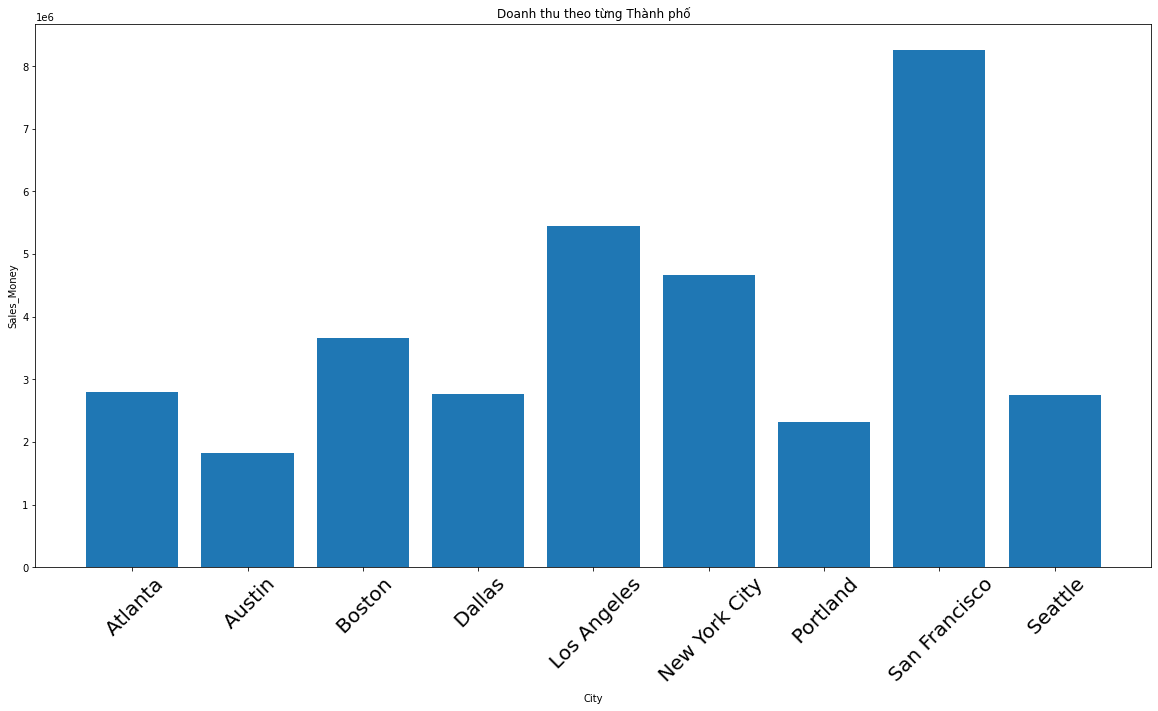

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(x=City, height=df2) # bieu do cot
plt.xticks(City, rotation=45, size=20) # set gia tri cho cot x
plt.xlabel("City")
plt.ylabel("Sales_Money")
plt.title('Doanh thu theo từng Thành phố')
plt.show()

### 3.3 Giải thích những câu hỏi đặt ra bằng cách đi tìm dữ liệu chứng minh

In [ ]:
# Sản phẩm nào bán ra nhiều nhất và vì sao?
# Why tháng 12 có doanh thu cao nhất?(do các dịp lễ lớn tập trung vào cuối năm? Các công ty lớn thường tổ chức sự kiện ra mắt sản phẩm vào cuối năm?...)
# Why SF có doanh thu cao nhất?( Có phải vì đây Công ty Silicon tập trung ở đây? Có phải thành phố có nhiều kĩ sư sử dụng đồ công nghệ?)

### 3.4. Doanh nghiệp cần tăng ads vào thời gian nào để thu hút nhiều khách hàng?

In [ ]:
# Thời gian rảnh vào buổi tối? Ăn trưa? 8h sáng?

In [ ]:
df

,Order ID,Product,Quantity Ordered,Price Each,Price,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin
...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,San Francisco
25113,319667,AA Batteries (4-pack),2,3.84,7.68,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,Los Angeles
25114,319668,Vareebadd Phone,1,400.00,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,Seattle
25115,319669,Wired Headphones,1,11.99,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,Dallas


In [ ]:
def get_time(sample_time):
  return (sample_time.split(' ')[-1]).split(':')[-2]

In [ ]:
df['Time'] = df['Order Date'].apply(get_time)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Price,Order Date,Purchase Address,Month,City,Time
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin,11


In [ ]:
df['Order Date'].dtypes

dtype('O')

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Price,Order Date,Purchase Address,Month,City,Time
0,141234,iPhone,1,700.00,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.99,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


In [ ]:
df['Order Date'].dtypes

dtype('<M8[ns]')

In [ ]:
# Cach 2 su dung ham co san
time = df['Order Date'].dt.hour
time

0        21
1        14
2        13
3        20
4        11
         ..
25112    20
25113    12
25114     6
25115    10
25116    21
Name: Order Date, Length: 185950, dtype: int64

In [ ]:
df3 = df.groupby('Time').sum()['Quantity Ordered']
# Cach suy nghi nay dung

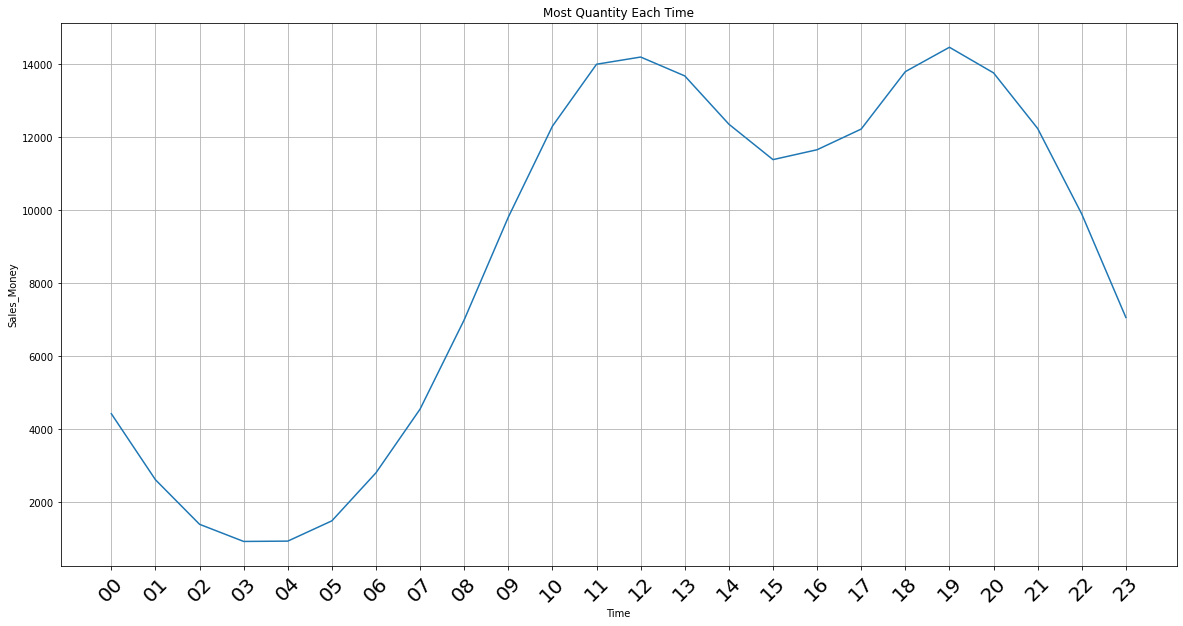

In [ ]:
time = np.array(df3.index)
plt.figure(figsize=(20,10))
plt.plot(time, df3) # bieu do cot sang duong de co su lien tuc giua cac khung gio
plt.grid() # Them luoi mo cho de nhin
plt.xticks(time, rotation=45, size=20) # set gia tri cho cot x
plt.xlabel("Time")
plt.ylabel("Sales_Money")
plt.title('Most Quantity Each Time')
plt.show()

In [ ]:
# 11- 12 h , hoac 7h toi la doanh thu cao nhat. Ta nen quang cao truoc do 30p de dat hieu qua cao nhat
# Đây là tổng quang với tất cả thành phố. Ta nên xử lí với từng thành phố để đặt được hiểu quả cao nhất bạn nhé!



































































### What products often sold together?

In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Price,Order Date,Purchase Address,Month,City,Time
0,141234,iPhone,1,700.00,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.99,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


In [ ]:
df.sort_values('Time')

,Order ID,Product,Quantity Ordered,Price Each,Price,Order Date,Purchase Address,Month,City,Time
9050,218552,Vareebadd Phone,1,400.00,400.00,2019-06-19 00:19:00,"385 Lincoln St, Los Angeles, CA 90001",06,Los Angeles,00
10058,219507,27in FHD Monitor,1,149.99,149.99,2019-06-04 00:17:00,"669 14th St, Dallas, TX 75001",06,Dallas,00
10072,219521,Vareebadd Phone,1,400.00,400.00,2019-06-05 00:35:00,"845 Highland St, San Francisco, CA 94016",06,San Francisco,00
10094,219542,AA Batteries (4-pack),1,3.84,3.84,2019-06-05 00:06:00,"33 Highland St, Los Angeles, CA 90001",06,Los Angeles,00
10114,219562,27in FHD Monitor,1,149.99,149.99,2019-06-13 00:27:00,"859 Sunset St, San Francisco, CA 94016",06,San Francisco,00
...,...,...,...,...,...,...,...,...,...,...
10222,257958,USB-C Charging Cable,1,11.95,11.95,2019-09-26 23:20:00,"239 Meadow St, Austin, TX 73301",09,Austin,23
9869,171438,AA Batteries (4-pack),2,3.84,7.68,2019-03-18 23:25:00,"480 West St, Boston, MA 02215",03,Boston,23
16077,311027,Lightning Charging Cable,1,14.95,14.95,2019-12-24 23:25:00,"231 Highland St, New York City, NY 10001",12,New York City,23
4016,197907,AAA Batteries (4-pack),1,2.99,2.99,2019-05-23 23:58:00,"966 Church St, Atlanta, GA 30301",05,Atlanta,23


In [ ]:
df_dup = df[df['Order Date'].duplicated(keep=False)]
df_dup

,Order ID,Product,Quantity Ordered,Price Each,Price,Order Date,Purchase Address,Month,City,Time
2,141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
5,141239,AAA Batteries (4-pack),1,2.99,2.99,2019-01-29 20:22:00,"775 Willow St, San Francisco, CA 94016",01,San Francisco,20
14,141248,Flatscreen TV,1,300.00,300.00,2019-01-03 21:54:00,"363 Spruce St, Austin, TX 73301",01,Austin,21
18,141252,USB-C Charging Cable,1,11.95,11.95,2019-01-30 09:28:00,"220 9th St, Los Angeles, CA 90001",01,Los Angeles,09
...,...,...,...,...,...,...,...,...,...,...
25104,319658,AAA Batteries (4-pack),2,2.99,5.98,2019-12-24 20:46:00,"574 Dogwood St, San Francisco, CA 94016",12,San Francisco,20
25106,319660,Apple Airpods Headphones,1,150.00,150.00,2019-12-16 17:41:00,"247 5th St, Los Angeles, CA 90001",12,Los Angeles,17
25108,319662,Bose SoundSport Headphones,1,99.99,99.99,2019-12-31 19:07:00,"939 8th St, San Francisco, CA 94016",12,San Francisco,19
25111,319665,iPhone,1,700.00,700.00,2019-12-15 11:13:00,"377 1st St, Atlanta, GA 30301",12,Atlanta,11


In [ ]:
join_product = lambda product: ', '.join(product)

In [ ]:
df_dup['All Products'] = df_dup.groupby(['Order Date'])['Product'].transform(join_product)
df_dup

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Price,Order Date,Purchase Address,Month,City,Time,All Products
2,141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13,"Wired Headphones, Apple Airpods Headphones"
3,141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20,"27in FHD Monitor, 34in Ultrawide Monitor"
5,141239,AAA Batteries (4-pack),1,2.99,2.99,2019-01-29 20:22:00,"775 Willow St, San Francisco, CA 94016",01,San Francisco,20,"AAA Batteries (4-pack), Lightning Charging Cable"
14,141248,Flatscreen TV,1,300.00,300.00,2019-01-03 21:54:00,"363 Spruce St, Austin, TX 73301",01,Austin,21,"Flatscreen TV, Apple Airpods Headphones, Wired..."
18,141252,USB-C Charging Cable,1,11.95,11.95,2019-01-30 09:28:00,"220 9th St, Los Angeles, CA 90001",01,Los Angeles,09,"USB-C Charging Cable, Lightning Charging Cable"
...,...,...,...,...,...,...,...,...,...,...,...
25104,319658,AAA Batteries (4-pack),2,2.99,5.98,2019-12-24 20:46:00,"574 Dogwood St, San Francisco, CA 94016",12,San Francisco,20,"20in Monitor, AA Batteries (4-pack), AAA Batte..."
25106,319660,Apple Airpods Headphones,1,150.00,150.00,2019-12-16 17:41:00,"247 5th St, Los Angeles, CA 90001",12,Los Angeles,17,"Apple Airpods Headphones, AAA Batteries (4-pac..."
25108,319662,Bose SoundSport Headphones,1,99.99,99.99,2019-12-31 19:07:00,"939 8th St, San Francisco, CA 94016",12,San Francisco,19,"Flatscreen TV, Bose SoundSport Headphones"
25111,319665,iPhone,1,700.00,700.00,2019-12-15 11:13:00,"377 1st St, Atlanta, GA 30301",12,Atlanta,11,"Wired Headphones, iPhone"


In [ ]:
df_dup = df_dup[['Order ID', 'All Products']].drop_duplicates()
df_dup

,Order ID,All Products
2,141236,"Wired Headphones, Apple Airpods Headphones"
3,141237,"27in FHD Monitor, 34in Ultrawide Monitor"
5,141239,"AAA Batteries (4-pack), Lightning Charging Cable"
14,141248,"Flatscreen TV, Apple Airpods Headphones, Wired..."
18,141252,"USB-C Charging Cable, Lightning Charging Cable"
...,...,...
25104,319658,"20in Monitor, AA Batteries (4-pack), AAA Batte..."
25106,319660,"Apple Airpods Headphones, AAA Batteries (4-pac..."
25108,319662,"Flatscreen TV, Bose SoundSport Headphones"
25111,319665,"Wired Headphones, iPhone"


In [ ]:
from itertools import combinations
from collections import Counter

count = Counter()

for products in df_dup['All Products']:
    product_list = products.split(",")
    count.update(Counter(combinations(product_list, 2)))

print(count)

Counter({('iPhone', ' Lightning Charging Cable'): 1388, ('AA Batteries (4-pack)', ' USB-C Charging Cable'): 1321, ('AAA Batteries (4-pack)', ' Lightning Charging Cable'): 1312, ('Google Phone', ' USB-C Charging Cable'): 1305, ('AAA Batteries (4-pack)', ' AA Batteries (4-pack)'): 1262, ('AAA Batteries (4-pack)', ' USB-C Charging Cable'): 1247, ('USB-C Charging Cable', ' USB-C Charging Cable'): 1246, ('USB-C Charging Cable', ' AAA Batteries (4-pack)'): 1245, ('USB-C Charging Cable', ' Lightning Charging Cable'): 1244, ('AA Batteries (4-pack)', ' Lightning Charging Cable'): 1231, ('Lightning Charging Cable', ' USB-C Charging Cable'): 1213, ('AA Batteries (4-pack)', ' AAA Batteries (4-pack)'): 1178, ('AA Batteries (4-pack)', ' AA Batteries (4-pack)'): 1178, ('Lightning Charging Cable', ' AA Batteries (4-pack)'): 1162, ('Lightning Charging Cable', ' Lightning Charging Cable'): 1158, ('Lightning Charging Cable', ' AAA Batteries (4-pack)'): 1148, ('AAA Batteries (4-pack)', ' Wired Headphones'

In [ ]:
# Nho vao phan tich doanh nghiep co the ban theo combo de ban chay hon
# Hoac dinh kem giam gia khi mua 2 san pham nay de kich cau tieu dung

In [ ]:
print(count)

Counter({('iPhone', ' Lightning Charging Cable'): 1388, ('AA Batteries (4-pack)', ' USB-C Charging Cable'): 1321, ('AAA Batteries (4-pack)', ' Lightning Charging Cable'): 1312, ('Google Phone', ' USB-C Charging Cable'): 1305, ('AAA Batteries (4-pack)', ' AA Batteries (4-pack)'): 1262, ('AAA Batteries (4-pack)', ' USB-C Charging Cable'): 1247, ('USB-C Charging Cable', ' USB-C Charging Cable'): 1246, ('USB-C Charging Cable', ' AAA Batteries (4-pack)'): 1245, ('USB-C Charging Cable', ' Lightning Charging Cable'): 1244, ('AA Batteries (4-pack)', ' Lightning Charging Cable'): 1231, ('Lightning Charging Cable', ' USB-C Charging Cable'): 1213, ('AA Batteries (4-pack)', ' AAA Batteries (4-pack)'): 1178, ('AA Batteries (4-pack)', ' AA Batteries (4-pack)'): 1178, ('Lightning Charging Cable', ' AA Batteries (4-pack)'): 1162, ('Lightning Charging Cable', ' Lightning Charging Cable'): 1158, ('Lightning Charging Cable', ' AAA Batteries (4-pack)'): 1148, ('AAA Batteries (4-pack)', ' Wired Headphones'

### 3.5 What products sold the most? Why do you think it sold most?

In [ ]:
df4 = df.groupby('Product').sum()['Quantity Ordered']
df4

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

In [ ]:
product = df4.index
product

Index(['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor',
       '34in Ultrawide Monitor', 'AA Batteries (4-pack)',
       'AAA Batteries (4-pack)', 'Apple Airpods Headphones',
       'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone',
       'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable',
       'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable',
       'Vareebadd Phone', 'Wired Headphones', 'iPhone'],
      dtype='object', name='Product')

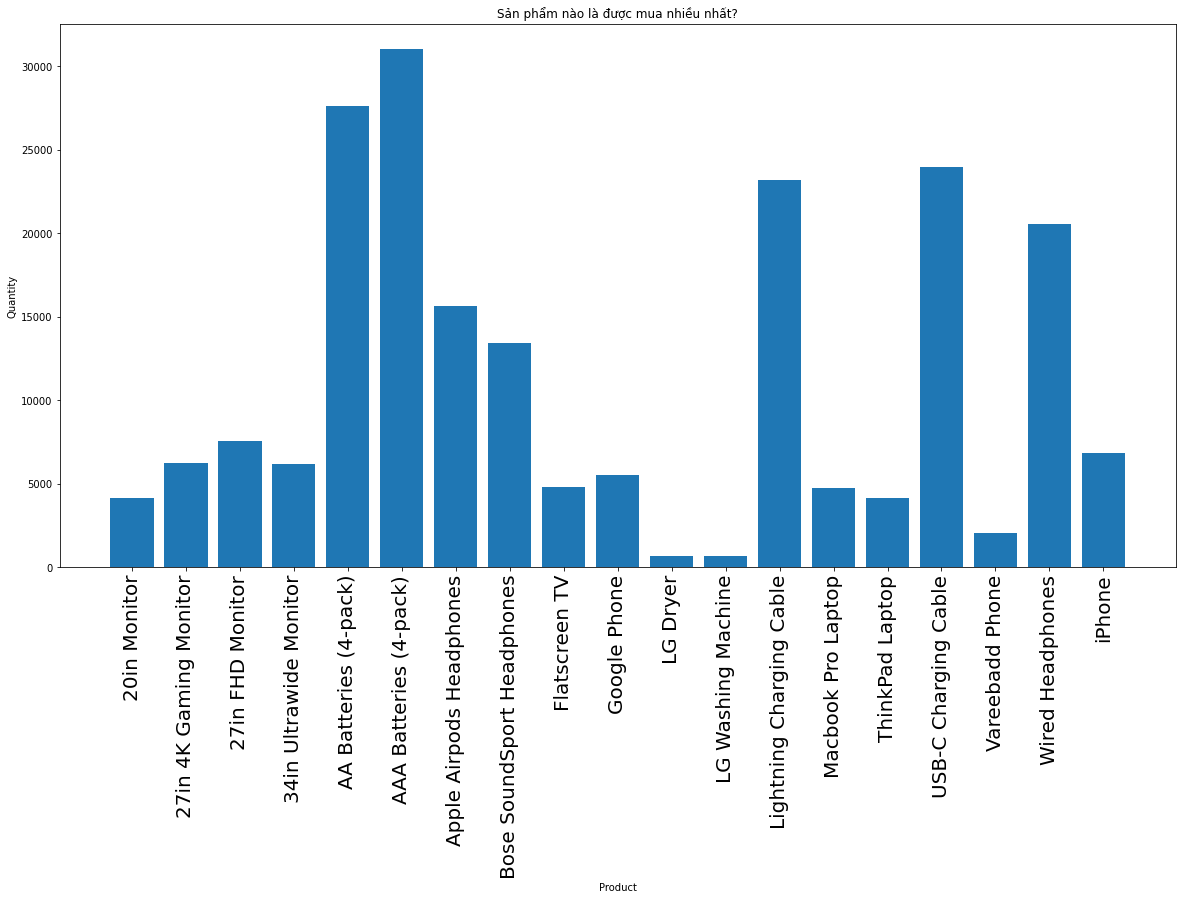

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(x=product, height=df4) # bieu do cot
plt.xticks(product, rotation=90, size=20) # set gia tri cho cot x
plt.xlabel("Product")
plt.ylabel("Quantity")
plt.title('Sản phẩm nào là được mua nhiều nhất?')
plt.show()
plt.bar()

In [ ]:
# price, brand, quality?
# ==> Price

In [ ]:
price = df.groupby('Product').mean()['Price Each']
price

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

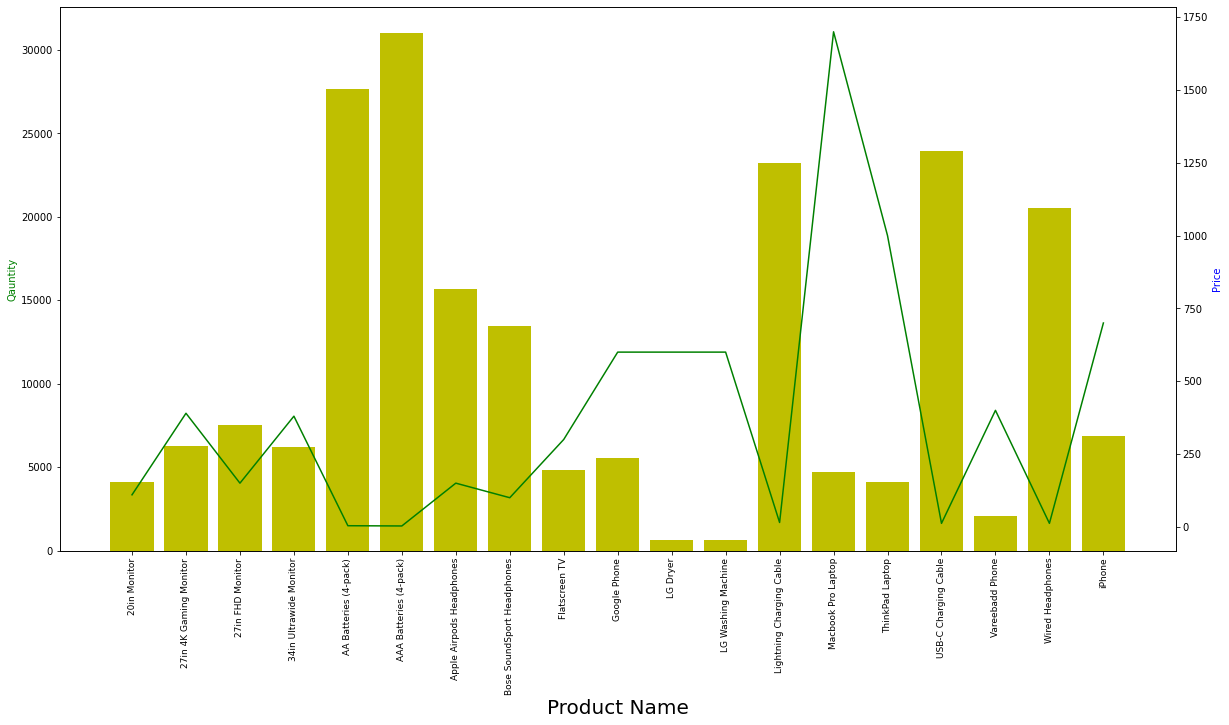

In [ ]:
x = product
y1 = df4.values
y2 = price

fig, ax1 = plt.subplots(figsize=(20,10))

ax2 = ax1.twinx()
ax1.bar(x, y1, color='y')
ax2.plot(x, y2, color='g')
ax1.set_xticklabels(product, rotation=90, size=9)
ax1.set_xlabel('Product Name', size=20)
ax1.set_ylabel('Qauntity', color='g')
ax2.set_ylabel('Price', color='b')

plt.show()

In [ ]:
# Ta dễ dàng thấy được 2 san phẩm bán chạy nhất có giá tương đối thấp, và diều ngược lại là đúng.
# Riêng Macbook Apple và Thinkpad laptop dù giá cao nhưng vãn bán chạy. Chứng tỏ chất lượng đã đượcn người dùng đánh giá cao


# **Sale Analyses Project 2**
## Họ và tên: Nguyễn Việt Thư
## Chủ đề: Phân tích bán hàng

##**Step 1: Reading file**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

In [ ]:
df_org = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data/salesforcourse-4fe2kehu.xlsx')
df_org.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,2016-02-19,2016,February,29,F,United States,Washington,Accessories,Tires and Tubes,1,80.00,109.000000,80,109,NaN
1,1,2016-02-20,2016,February,29,F,United States,Washington,Clothing,Gloves,2,24.50,28.500000,49,57,NaN
2,2,2016-02-27,2016,February,29,F,United States,Washington,Accessories,Tires and Tubes,3,3.67,5.000000,11,15,NaN
3,3,2016-03-12,2016,March,29,F,United States,Washington,Accessories,Tires and Tubes,2,87.50,116.500000,175,233,NaN
4,4,2016-03-12,2016,March,29,F,United States,Washington,Accessories,Tires and Tubes,3,35.00,41.666667,105,125,NaN


In [ ]:
df = df_org.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34866 entries, 0 to 34865
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             34866 non-null  int64         
 1   Date              34866 non-null  datetime64[ns]
 2   Year              34866 non-null  int64         
 3   Month             34866 non-null  object        
 4   Customer Age      34866 non-null  int64         
 5   Customer Gender   34866 non-null  object        
 6   Country           34866 non-null  object        
 7   State             34866 non-null  object        
 8   Product Category  34866 non-null  object        
 9   Sub Category      34866 non-null  object        
 10  Quantity          34866 non-null  int64         
 11  Unit Cost         34866 non-null  float64       
 12  Unit Price        34866 non-null  float64       
 13  Cost              34866 non-null  int64         
 14  Revenue           3486

- Column1 is unknow feature and have many null value
- All columns have suitable dtype


In [ ]:
df.describe()

,index,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
count,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,2574.000000
mean,17432.500000,2015.569237,36.382895,2.002524,349.880567,389.232485,576.004532,640.870074,688.054913
std,10065.091579,0.495190,11.112902,0.813936,490.015846,525.319091,690.500395,736.650597,774.200897
min,0.000000,2015.000000,17.000000,1.000000,0.670000,0.666667,2.000000,2.000000,2.000000
25%,8716.250000,2015.000000,28.000000,1.000000,45.000000,53.666667,85.000000,102.000000,104.250000
50%,17432.500000,2016.000000,35.000000,2.000000,150.000000,179.000000,261.000000,319.000000,390.500000
75%,26148.750000,2016.000000,44.000000,3.000000,455.000000,521.000000,769.000000,902.000000,975.750000
max,34865.000000,2016.000000,87.000000,3.000000,3240.000000,5082.000000,3600.000000,5082.000000,3681.000000


Comment:
  - this is old sales transactions dataset in 2015 and 2016
  - we have Date so we can tracking sale trend over the time
  - Customer Age, Gender: we can analyse chasing behavior base on the differance demographic groups
  - we have the cost of product and revenue generated from its sale, allowing for calculations of profit and profit margin.


##**Step 2: Analysys**

In [ ]:
df.columns

Index(['index', 'Date', 'Year', 'Month', 'Customer Age', 'Customer Gender',
       'Country', 'State', 'Product Category', 'Sub Category', 'Quantity',
       'Unit Cost', 'Unit Price', 'Cost', 'Revenue', 'Column1'],
      dtype='object')

### Key Metric

In [ ]:
df.tail()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
34861,34861,2015-03-22,2015,March,38,M,France,Charente-Maritime,Bikes,Mountain Bikes,1,2049.0,1487.000000,2049,1487,NaN
34862,34862,2016-02-07,2016,February,38,M,France,Hauts de Seine,Bikes,Mountain Bikes,2,1160.0,985.500000,2320,1971,NaN
34863,34863,2015-03-13,2015,March,38,M,France,Hauts de Seine,Bikes,Mountain Bikes,1,2049.0,1583.000000,2049,1583,NaN
34864,34864,2015-04-05,2015,April,38,M,France,Hauts de Seine,Bikes,Mountain Bikes,3,683.0,560.666667,2049,1682,NaN
34865,34865,2015-08-30,2015,August,38,M,France,Hauts de Seine,Bikes,Mountain Bikes,1,2320.0,1568.000000,2320,1568,NaN


In [ ]:
# Total cost
cost = df.Cost.sum()
print ('\033[1m' + "Total cost is: {:,}$".format(cost))

Total cost is: 20,082,974$


In [ ]:
# Total revenue
revenue =  df.Revenue.sum()
print('\033[1m' + 'Total revenue is: {:,}$'.format(revenue))

Total revenue is: 22,344,576$


In [ ]:
# Total amount
volume = df.Quantity.sum()
print('\033[1m' + 'Total amount is: {:,}'.format(volume))

Total amount is: 69,820


In [ ]:
# Profit Margin
profit_margin = (revenue - cost) / revenue
print('\033[1m' + 'Profit margin is: %.2f%%' % (profit_margin*100))

Profit margin is: 10.12%


### Demographic: Age, Gender, State, Country

Giúp doanh nghiệp điều chỉnh sản phầm của mình theo theo từng địa phương, độ tuổi, giới tính sao cho phù hợp nhất

In [ ]:
#df['Age Brackets'] = np.nan

In [ ]:
# # Bracket the customer age
# for dataset in [df]:
#   dataset.loc[dataset['Customer Age'] <=18 , 'Age Brackets'] = 'Less than 18'
#   dataset.loc[(dataset['Customer Age'] > 18) & (dataset['Customer Age'] <= 50) , 'Age Brackets'] = '18-50'
#   dataset.loc[dataset['Customer Age'] >50 , 'Age Brackets'] = '50+'

In [ ]:
# Chia dữ liệu thành các khoảng giá trị tuổi
bins = [0, 18, 50, 100]
labels = ['under 18', '18-50', 'over 50']
df['Age Brackets'] = pd.cut(df['Customer Age'], bins=bins, labels=labels)

# In kết quả
df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1,Age Brackets
0,0,2016-02-19,2016,February,29,F,United States,Washington,Accessories,Tires and Tubes,1,80.00,109.000000,80,109,NaN,18-50
1,1,2016-02-20,2016,February,29,F,United States,Washington,Clothing,Gloves,2,24.50,28.500000,49,57,NaN,18-50
2,2,2016-02-27,2016,February,29,F,United States,Washington,Accessories,Tires and Tubes,3,3.67,5.000000,11,15,NaN,18-50
3,3,2016-03-12,2016,March,29,F,United States,Washington,Accessories,Tires and Tubes,2,87.50,116.500000,175,233,NaN,18-50
4,4,2016-03-12,2016,March,29,F,United States,Washington,Accessories,Tires and Tubes,3,35.00,41.666667,105,125,NaN,18-50


In [ ]:
df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1,Age Brackets
0,0,2016-02-19,2016,February,29,F,United States,Washington,Accessories,Tires and Tubes,1,80.00,109.000000,80,109,NaN,18-50
1,1,2016-02-20,2016,February,29,F,United States,Washington,Clothing,Gloves,2,24.50,28.500000,49,57,NaN,18-50
2,2,2016-02-27,2016,February,29,F,United States,Washington,Accessories,Tires and Tubes,3,3.67,5.000000,11,15,NaN,18-50
3,3,2016-03-12,2016,March,29,F,United States,Washington,Accessories,Tires and Tubes,2,87.50,116.500000,175,233,NaN,18-50
4,4,2016-03-12,2016,March,29,F,United States,Washington,Accessories,Tires and Tubes,3,35.00,41.666667,105,125,NaN,18-50


In [ ]:
pd.DatetimeIndex(df['Date'])[0].day
pd.DatetimeIndex(df['Date'])[0].month
pd.DatetimeIndex(df['Date'])[0].year

2016

In [ ]:
df['Product Category'].unique()

array(['Accessories', 'Clothing', 'Bikes'], dtype=object)

In [ ]:
df['Sub Category'].unique()

array(['Tires and Tubes', 'Gloves', 'Helmets', 'Bike Stands',
       'Mountain Bikes', 'Hydration Packs', 'Jerseys', 'Fenders',
       'Cleaners', 'Socks', 'Caps', 'Touring Bikes', 'Bottles and Cages',
       'Vests', 'Road Bikes', 'Bike Racks', 'Shorts'], dtype=object)

In [ ]:
corr = df.corr()
corr

,index,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
index,1.000000,0.003961,-0.045523,0.002157,-0.068250,-0.069691,-0.081392,-0.083341,-0.145997
Year,0.003961,1.000000,0.049873,0.000919,-0.073245,-0.022628,-0.084566,-0.025361,-0.025333
Customer Age,-0.045523,0.049873,1.000000,0.004383,0.022362,0.023412,0.023641,0.024836,0.001198
Quantity,0.002157,0.000919,0.004383,1.000000,-0.312514,-0.324109,0.008295,0.008418,-0.024744
Unit Cost,-0.068250,-0.073245,0.022362,-0.312514,1.000000,0.981033,0.854908,0.836957,0.021894
Unit Price,-0.069691,-0.022628,0.023412,-0.324109,0.981033,1.000000,0.832968,0.851034,0.019971
Cost,-0.081392,-0.084566,0.023641,0.008295,0.854908,0.832968,1.000000,0.979119,0.024892
Revenue,-0.083341,-0.025361,0.024836,0.008418,0.836957,0.851034,0.979119,1.000000,0.022325
Column1,-0.145997,-0.025333,0.001198,-0.024744,0.021894,0.019971,0.024892,0.022325,1.000000


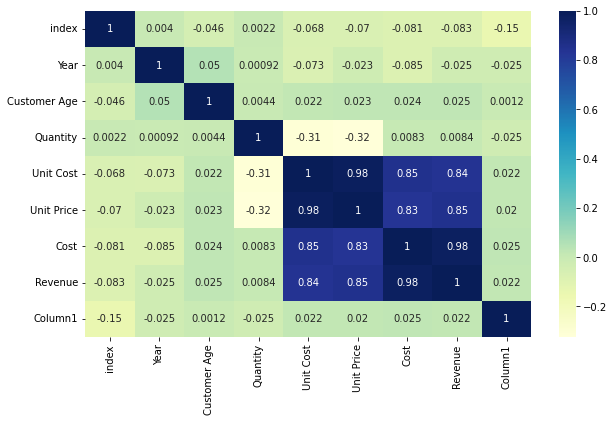

In [ ]:
# plotting correlation heatmap
plt.figure(figsize=(10,6))
dataplot = sb.heatmap(corr, cmap="YlGnBu", annot=True)
# displaying heatmap
plt.show()

In [ ]:
df.groupby(['Age Brackets']).sum()

,index,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
Age Brackets,,,,,,,,,
under 18,15937254,1628547,14187,1618,192823.35,2.204230e+05,327347,373717,6.317000e+03
18-50,520863963,60043779,1013529,59688,10572714.67,1.175111e+07,17407842,19351745,1.523064e+06
over 50,71000328,8602511,240810,8514,1433397.82,1.599445e+06,2347785,2619114,2.416723e+05


In [ ]:
df_by_AB = df.groupby(['Age Brackets']).sum()['Quantity'].reset_index()

In [ ]:
df_by_AB

,Age Brackets,Quantity
0,under 18,1618
1,18-50,59688
2,over 50,8514


<Axes: xlabel='Age Brackets', ylabel='Quantity'>

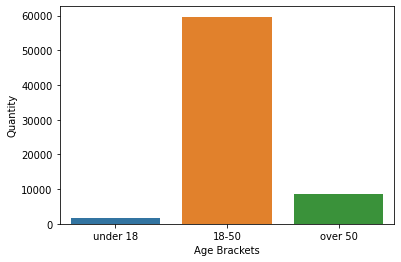

In [ ]:
# Subcaterory with hue = gender and age brackets
# Group by a categorical varaible and plot aggregated values, with confidence intervals:
sb.barplot(data=df_by_AB, x="Age Brackets", y="Quantity")

- Phân nhóm theo những nhóm tuổi hợp lí
   - Thiếu niên dưới 18 tuổi: học sinh, những người chưa tạo ra thu nhập
   - Người trưởng thành 18-50: Nhóm người tạo ra được thu nhập cá nhân, có nhu cầu mua cao
   - Nhóm trên 50: Người lớn tuổi có ít nhu cầu mua hàng hơn

In [ ]:
df_by_G = df.groupby(['Customer Gender']).sum()['Quantity'].reset_index()
df_by_G

,Customer Gender,Quantity
0,F,34336
1,M,35484


<Axes: xlabel='Customer Gender', ylabel='Quantity'>

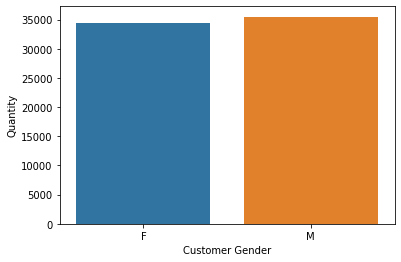

In [ ]:
# Add a second layer of grouping:
#sb.barplot(data=df_by_AB, x="Age Brackets", y="Quantity", hue="Customer Gender")
sb.barplot(data=df_by_G, x="Customer Gender", y="Quantity")

Không có sự chênh lệch quá lớn giữa nhu cầu mua hàng của 2 giới tính

In [ ]:
df_by_C = df.groupby(['Country']).sum()['Quantity'].reset_index()
df_by_C

,Country,Quantity
0,France,10373
1,Germany,10386
2,United Kingdom,12822
3,United States,36239


<Axes: xlabel='Country', ylabel='Quantity'>

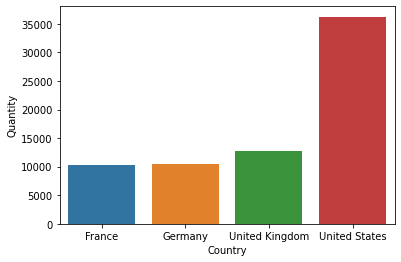

In [ ]:
sb.barplot(data=df_by_C, x="Country", y="Quantity")

Unite States là thị trường sales lớn nhất với 36239, kế đó là United Kingdom, Germany, France.

### Biên độ lợi nhuận theo tuổi và giới tính, xác định hành vi mua hàng

In [ ]:
df_by_country = df.groupby('Country')[['Revenue', 'Cost']].sum().reset_index()
print(df_by_country)

          Country   Revenue     Cost
0          France   3446104  3173447
1         Germany   4244510  3285685
2  United Kingdom   4276220  3947265
3   United States  10377742  9676577


In [ ]:
df_by_country['Profit Margin'] = (df_by_country['Revenue']-df_by_country['Cost'])/df_by_country['Revenue']

In [ ]:
df_by_country.head()

,Country,Revenue,Cost,Profit Margin
0,France,3446104,3173447,0.079120
1,Germany,4244510,3285685,0.225898
2,United Kingdom,4276220,3947265,0.076927
3,United States,10377742,9676577,0.067564


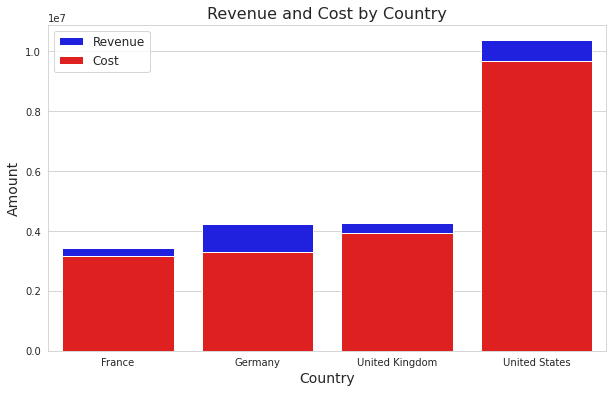

In [ ]:
sb.set_style('whitegrid')
sb.set_palette('husl')

plt.figure(figsize=(10, 6))
sb.barplot(x='Country', y='Revenue', data=df_by_country, color='b', label='Revenue')
sb.barplot(x='Country', y='Cost', data=df_by_country, color='r', label='Cost')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.title('Revenue and Cost by Country', fontsize=16)
plt.legend(fontsize=12)
plt.show()

- Germany là thị trường có profit margin cao nhất với 0.22, kế đến là France, Kingdom và thấp nhất là US.
- Có thể thấy Germany là thị trường tìm năng, có thể tập trung phát triển đem lại doanh thu.
- Trong khi đó US là 1 thị trường cạnh tranh cao, đòi hỏi giảm biên độ để cạnh tranh với đối thủ.

In [ ]:
# Tại sao cùng 1 loại sản phẩm nhưng biên độ lợi nhuận lại khác nhau?
df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1,Age Brackets
0,0,2016-02-19,2016,February,29,F,United States,Washington,Accessories,Tires and Tubes,1,80.00,109.000000,80,109,NaN,18-50
1,1,2016-02-20,2016,February,29,F,United States,Washington,Clothing,Gloves,2,24.50,28.500000,49,57,NaN,18-50
2,2,2016-02-27,2016,February,29,F,United States,Washington,Accessories,Tires and Tubes,3,3.67,5.000000,11,15,NaN,18-50
3,3,2016-03-12,2016,March,29,F,United States,Washington,Accessories,Tires and Tubes,2,87.50,116.500000,175,233,NaN,18-50
4,4,2016-03-12,2016,March,29,F,United States,Washington,Accessories,Tires and Tubes,3,35.00,41.666667,105,125,NaN,18-50


In [ ]:
 # Filter sub Gloves
df.loc[df['Sub Category'] == 'Gloves', :]

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1,Age Brackets
1,1,2016-02-20,2016,February,29,F,United States,Washington,Clothing,Gloves,2,24.50,28.500000,49,57,NaN,18-50
148,148,2016-03-28,2016,March,55,F,United States,California,Clothing,Gloves,2,343.00,359.000000,686,718,NaN,over 50
201,201,2016-06-10,2016,June,52,F,United States,California,Clothing,Gloves,3,220.33,269.666667,661,809,NaN,over 50
202,202,2016-04-24,2016,April,51,F,United States,Washington,Clothing,Gloves,3,106.00,125.333333,318,376,NaN,over 50
255,255,2016-01-09,2016,January,45,M,United States,California,Clothing,Gloves,2,73.50,82.000000,147,164,NaN,18-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34498,34498,2016-01-11,2016,January,36,F,United States,California,Clothing,Gloves,1,490.00,608.000000,490,608,NaN,18-50
34499,34499,2016-04-15,2016,April,36,F,United States,California,Clothing,Gloves,1,465.00,610.000000,465,610,NaN,18-50
34500,34500,2016-04-22,2016,April,36,F,United States,California,Clothing,Gloves,2,12.00,14.000000,24,28,NaN,18-50
34521,34521,2016-07-27,2016,July,61,F,United States,Oregon,Clothing,Gloves,2,24.50,32.000000,49,64,NaN,over 50


- Giá của cùng 1 sản phẩm giữa các ban khác nhau là khác nhau
- Giá cùng 1 sản phẩm thay đổi theo thời gian

In [ ]:
df_by_AB1 = df.groupby('Age Brackets')[['Revenue', 'Cost']].sum().reset_index()
df_by_AB1['Profit Margin'] = (df_by_AB1['Revenue']-df_by_AB1['Cost'])/df_by_AB1['Revenue']
print(df_by_AB1)

  Age Brackets   Revenue      Cost  Profit Margin
0     under 18    373717    327347       0.124078
1        18-50  19351745  17407842       0.100451
2      over 50   2619114   2347785       0.103596


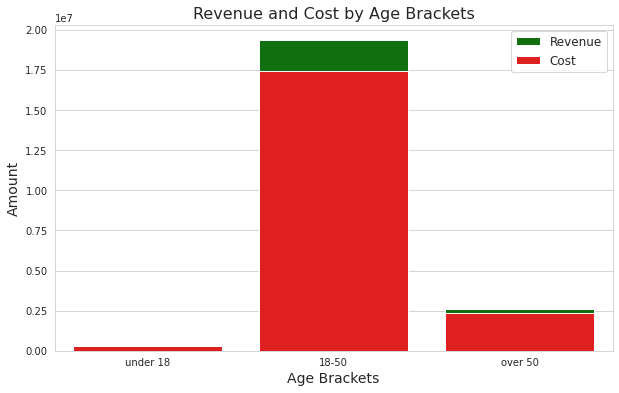

In [ ]:
sb.set_style('whitegrid')
sb.set_palette('husl')

plt.figure(figsize=(10, 6))
sb.barplot(x='Age Brackets', y='Revenue', data=df_by_AB1, color='g', label='Revenue')
sb.barplot(x='Age Brackets', y='Cost', data=df_by_AB1, color='r', label='Cost')
plt.xlabel('Age Brackets', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.title('Revenue and Cost by Age Brackets', fontsize=16)
plt.legend(fontsize=12)
plt.show()

Comments:
  - Group 18-50 has the highest profit margin.
  

In [ ]:
# Vậy bán sản phẩm nào là có biên độ lợi nhuận cao nhất?
df_by_cat = df.groupby('Product Category')[['Revenue', 'Cost']].sum().reset_index()
df_by_cat['Profit Margin'] = (df_by_cat['Revenue']-df_by_cat['Cost'])/df_by_cat['Revenue']
print(df_by_cat)


  Product Category   Revenue      Cost  Profit Margin
0      Accessories   7420664   6041895       0.185801
1            Bikes  11486355  11148754       0.029391
2         Clothing   3437557   2892325       0.158610


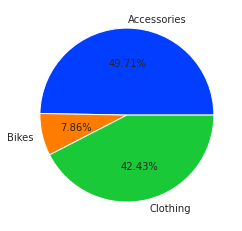

In [ ]:
# define Seaborn color palette to use
palette_color = sb.color_palette('bright')
  
# plotting data on chart
plt.pie(df_by_cat['Profit Margin'], labels=df_by_cat['Product Category'], colors=palette_color, autopct='%.2f%%')
  
# displaying chart
plt.show()

In [ ]:
# Which one sub product can get the high margin?
# 1: Filter
temp = df.loc[df['Product Category'] == 'Accessories']
temp_by_sub = temp.groupby('Sub Category')[['Cost', 'Revenue']].sum().reset_index()
temp_by_sub['Profit Margin'] = (temp_by_sub['Revenue']-temp_by_sub['Cost'])/temp_by_sub['Revenue']
temp_by_sub = temp_by_sub.sort_values(by='Profit Margin', ascending=False)

<Axes: xlabel='Sub Category', ylabel='Profit Margin'>

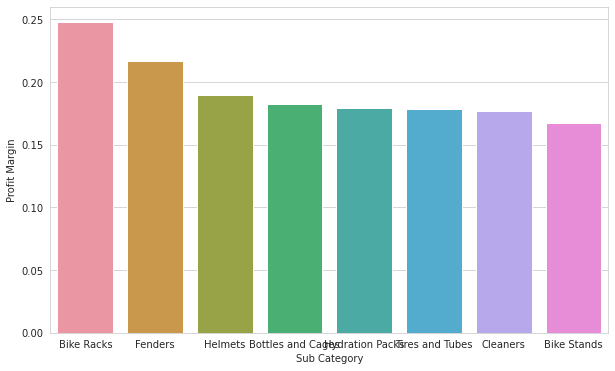

In [ ]:
plt.figure(figsize=(10, 6))
sb.barplot(data=temp_by_sub, x="Sub Category", y="Profit Margin")

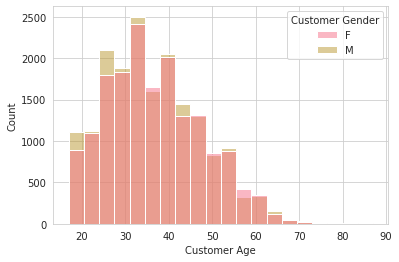

In [ ]:
# Biểu đồ phân phối của khách hàng theo giới tính
sb.histplot(data=df, x='Customer Age', hue='Customer Gender', bins=20)
plt.show()

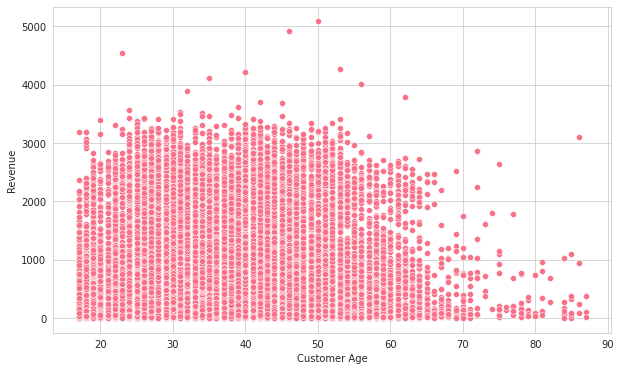

In [ ]:
# Mối quan hệ giữa độ tuổi và doanh thu
plt.figure(figsize=(10, 6))
sb.scatterplot(data=df, x='Customer Age', y='Revenue')
plt.show()

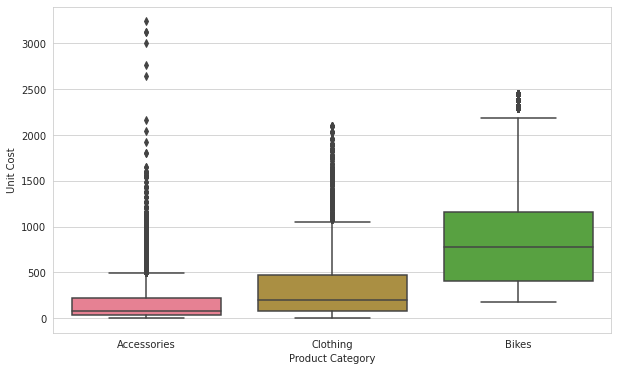

In [ ]:
# Phân phối giá thành của từng sản phẩm
plt.figure(figsize=(10, 6))
sb.boxplot(data=df, x='Product Category', y='Unit Cost')
plt.show()

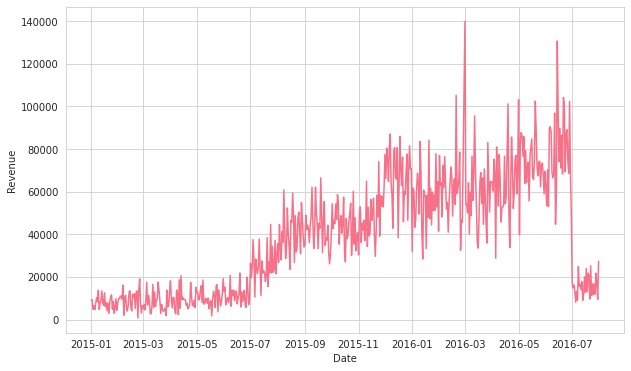

In [ ]:
# Xu hướng tăng trưởng doanh thu theo thời gian?
plt.figure(figsize=(10, 6))
revenue_by_date = df.groupby('Date')['Revenue'].sum().reset_index()
sb.lineplot(data=revenue_by_date, x='Date', y='Revenue')
plt.show()

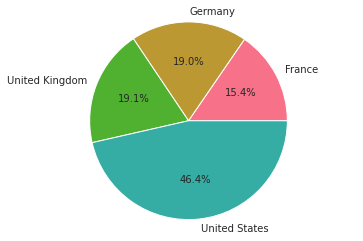

In [ ]:
# Doanh thu từng quốc gia 
revenue_by_country = df.groupby('Country')['Revenue'].sum().reset_index()
sb.set_style('darkgrid')
plt.pie(data=revenue_by_country, x='Revenue', labels='Country', autopct='%1.1f%%')
plt.axis('equal')
plt.show()

### Test

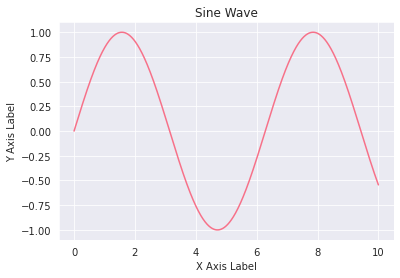

In [ ]:
# Biểu đồ đường 
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)
y = np.sin(x)

plt.plot(x, y)
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('Sine Wave')
plt.show()

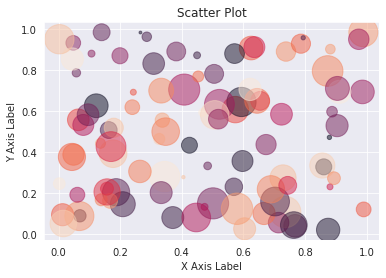

In [ ]:
# Biểu đồ scatter
x = np.random.rand(100)
y = np.random.rand(100)
colors = np.random.rand(100)
sizes = 1000 * np.random.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.5)
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('Scatter Plot')
plt.show()

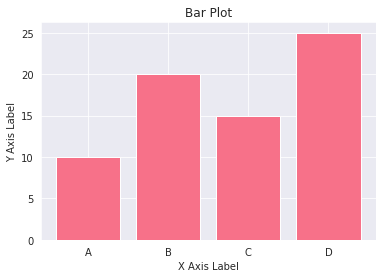

In [ ]:
# Biểu đồ bar
x = ['A', 'B', 'C', 'D']
y = [10, 20, 15, 25]

plt.bar(x, y)
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('Bar Plot')
plt.show()

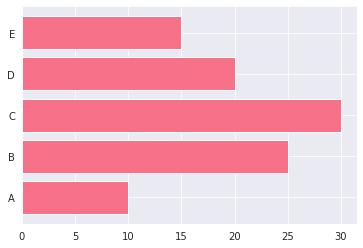

In [ ]:
# Hor bar chart
import matplotlib.pyplot as plt

# dữ liệu mẫu
categories = ['A', 'B', 'C', 'D', 'E']
values = [10, 25, 30, 20, 15]

# vẽ biểu đồ
plt.barh(categories, values)

# hiển thị biểu đồ
plt.show()

Text(0.5, 1.0, 'Category Sales')

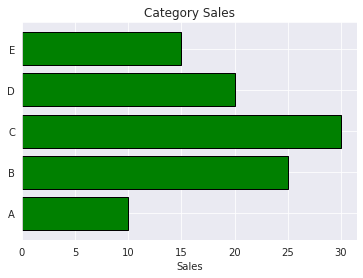

In [ ]:
plt.barh(categories, values, color='green', edgecolor='black')
plt.xlabel('Sales')
plt.title('Category Sales')

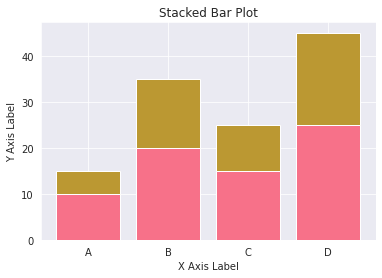

In [ ]:
# Biểu đồ stackbar
import matplotlib.pyplot as plt

x = ['A', 'B', 'C', 'D']
y1 = [10, 20, 15, 25]
y2 = [5, 15, 10, 20]

plt.bar(x, y1)
plt.bar(x, y2, bottom=y1)
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('Stacked Bar Plot')
plt.show()

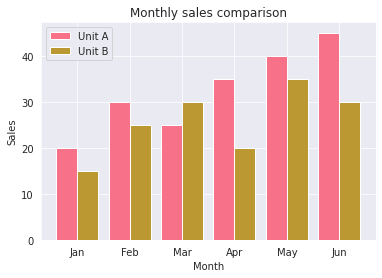

In [ ]:
# Grouped bar chart
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu giả định
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
sales_A = [20, 30, 25, 35, 40, 45]
sales_B = [15, 25, 30, 20, 35, 30]

# Tạo figure và axes object
fig, ax = plt.subplots()

# Tạo index cho các nhóm
index = np.arange(len(months))
bar_width = 0.4

# Vẽ các bars cho đơn vị A
ax.bar(index, sales_A, bar_width, label='Unit A')

# Vẽ các bars cho đơn vị B
ax.bar(index + bar_width, sales_B, bar_width, label='Unit B')

# Cấu hình biểu đồ
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(months)
ax.set_xlabel('Month')
ax.set_ylabel('Sales')
ax.set_title('Monthly sales comparison')
ax.legend()

# Hiển thị biểu đồ
plt.show()

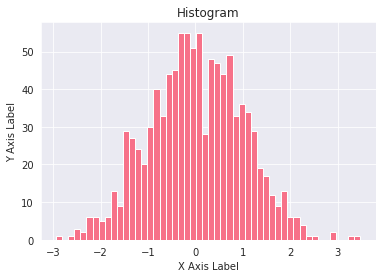

In [ ]:
# Biểu đồ histogram
x = np.random.randn(1000)

plt.hist(x, bins=50)
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('Histogram')
plt.show()

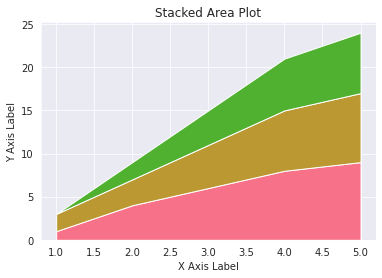

In [ ]:
# stacked area
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1, 6)
y1 = [1, 4, 6, 8, 9]
y2 = [2, 3, 5, 7, 8]
y3 = [0, 2, 4, 6, 7]

plt.stackplot(x, y1, y2, y3)
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('Stacked Area Plot')
plt.show()

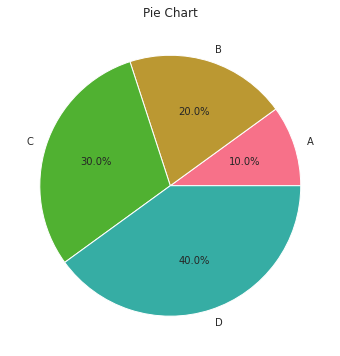

In [ ]:
# Biểu đồ pie
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
labels = ['A', 'B', 'C', 'D']
sizes = [10, 20, 30, 40]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Pie Chart')
plt.show()

Text(0.5, 1.0, 'Anh ba ga!')

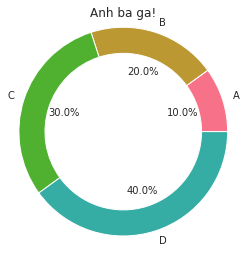

In [ ]:
# Biểu đồ donut
import matplotlib.pyplot as plt

labels = ['A', 'B', 'C', 'D']
sizes = [10, 20, 30, 40]

fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, radius=1.2, wedgeprops=dict(width=0.3, edgecolor='w'), autopct='%1.1f%%')
ax.pie([1], colors='w', radius=0.8)

plt.title('Anh ba ga!')

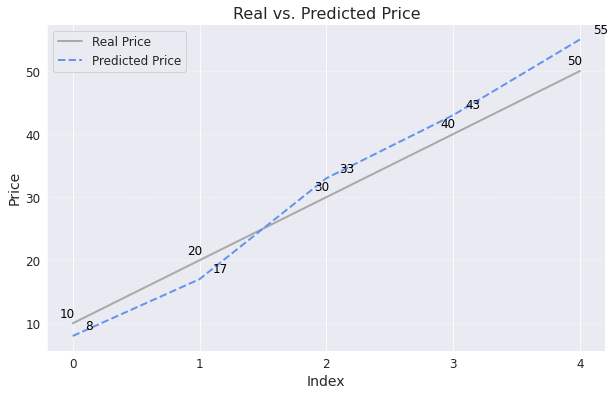

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# create the dataset
data = {'Real Price': [10, 20, 30, 40, 50],
        'Predicted Price': [8, 17, 33, 43, 55]}
df = pd.DataFrame(data)

# create the line chart
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df.index, df['Real Price'], color='darkgray', linewidth=2, label='Real Price')
ax.plot(df.index, df['Predicted Price'], color='cornflowerblue', linewidth=2, linestyle='--', label='Predicted Price')

# set x-axis label and tick font size
ax.set_xlabel('Index', fontsize=14)
ax.set_xticks(df.index)
ax.tick_params(axis='x', labelsize=12)

# set y-axis label and tick font size
ax.set_ylabel('Price', fontsize=14)
ax.tick_params(axis='y', labelsize=12)

# set title
ax.set_title('Real vs. Predicted Price', fontsize=16)

# add legend
ax.legend(fontsize=12)

# add data labels
for i, v in enumerate(d['Real Price']):
    ax.text(i - 0.1, v + 1, str(v), color='black', fontsize=12)
for i, v in enumerate(d['Predicted Price']):
    ax.text(i + 0.1, v + 1, str(v), color='black', fontsize=12)

# add grid lines
ax.grid(axis='y', linestyle='--', alpha=0.5)

# remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()
